In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

In [2]:
N = 30
z = 17

In [5]:
with pm.Model() as model:
    
    #Define the two factories
    model_index = pm.DiscreteUniform('model_index', lower=0, upper=1)
    
    k = 20
    w = pm.math.switch(pm.math.eq(model_index,0) , 0.1, 0.9)
    
    alpha = w * (k-2) +1
    beta = (1-w)*(k-2) + 1
    theta = pm.Beta('theta', alpha, beta)
    
    y = pm.Binomial('y', p=theta, n=N, observed=z)
    trace = pm.sample(10000)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [model_index]
>NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:16<00:00, 638.48it/s]
The number of effective samples is smaller than 10% for some parameters.


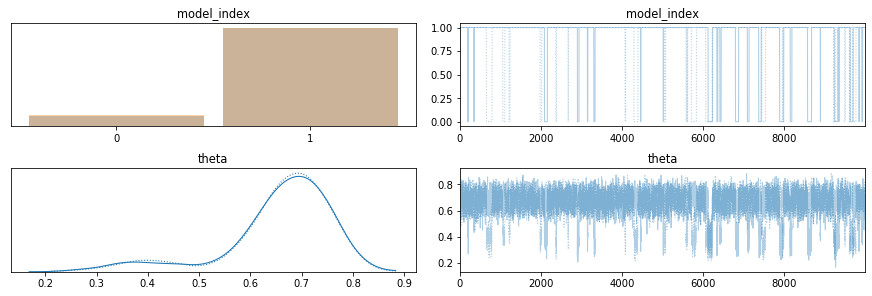

In [6]:
pm.traceplot(trace);

0.0987 0.9013


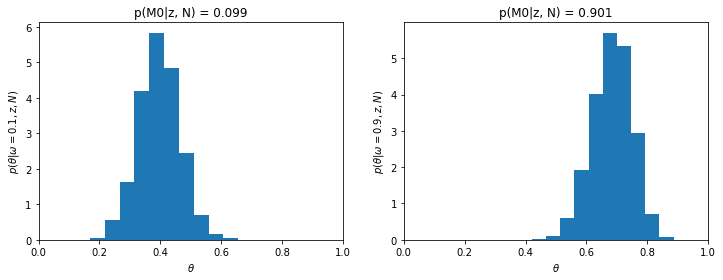

In [8]:
model_index_samples = trace['model_index']

p_M0 = sum(model_index_samples ==0)/len(model_index_samples)

p_M1 = 1- p_M0
print(p_M0, p_M1)

theta_sample = trace['theta']
theta_sample_M0 = theta_sample[model_index_samples == 0]
theta_sample_M1 = theta_sample[model_index_samples == 1]

fig, axs = plt.subplots(1,2, figsize=(12,4))

axs[0].hist(theta_sample_M0, density=True)
axs[0].set_ylabel(r'$p(\theta|\omega=0.1, z, N)$')
axs[0].set_title('p(M0|z, N) = {:.3f}'.format(p_M0))

axs[1].hist(theta_sample_M1, density=True)
axs[1].set_ylabel(r'$p(\theta|\omega=0.9, z, N)$')
axs[1].set_title('p(M0|z, N) = {:.3f}'.format(p_M1))

for ax in axs:
    ax.set_xlabel(r'$\theta$')
    ax.set_xlim(0,1);

In [9]:
with pm.Model() as model:
    model_index = pm.Categorical('model_index', p=[.5,.5])
    
    k=20
    w = w = pm.math.switch(pm.math.eq(model_index,0) , 0.1, 0.9)
    
    alpha = w * (k-2) +1
    beta = (1-w)*(k-2) + 1
    theta = pm.Beta('theta', alpha, beta, shape=2)
    
    y = pm.Binomial('y', p=theta[model_index], n=N, observed=z)
    
    trace = pm.sample(5000)
    
    

Sequential sampling (2 chains in 1 job)
CompoundStep
>BinaryGibbsMetropolis: [model_index]
>NUTS: [theta]
Sampling chain 1, 0 divergences: 100%|██████████| 5500/5500 [00:11<00:00, 472.11it/s]
The acceptance probability does not match the target. It is 0.8814361743319603, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.5816084638614721, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


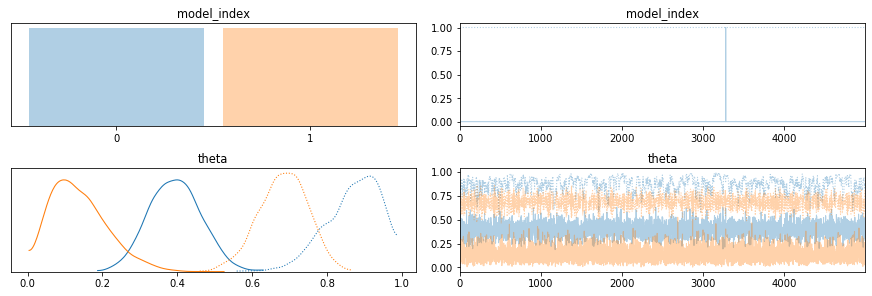

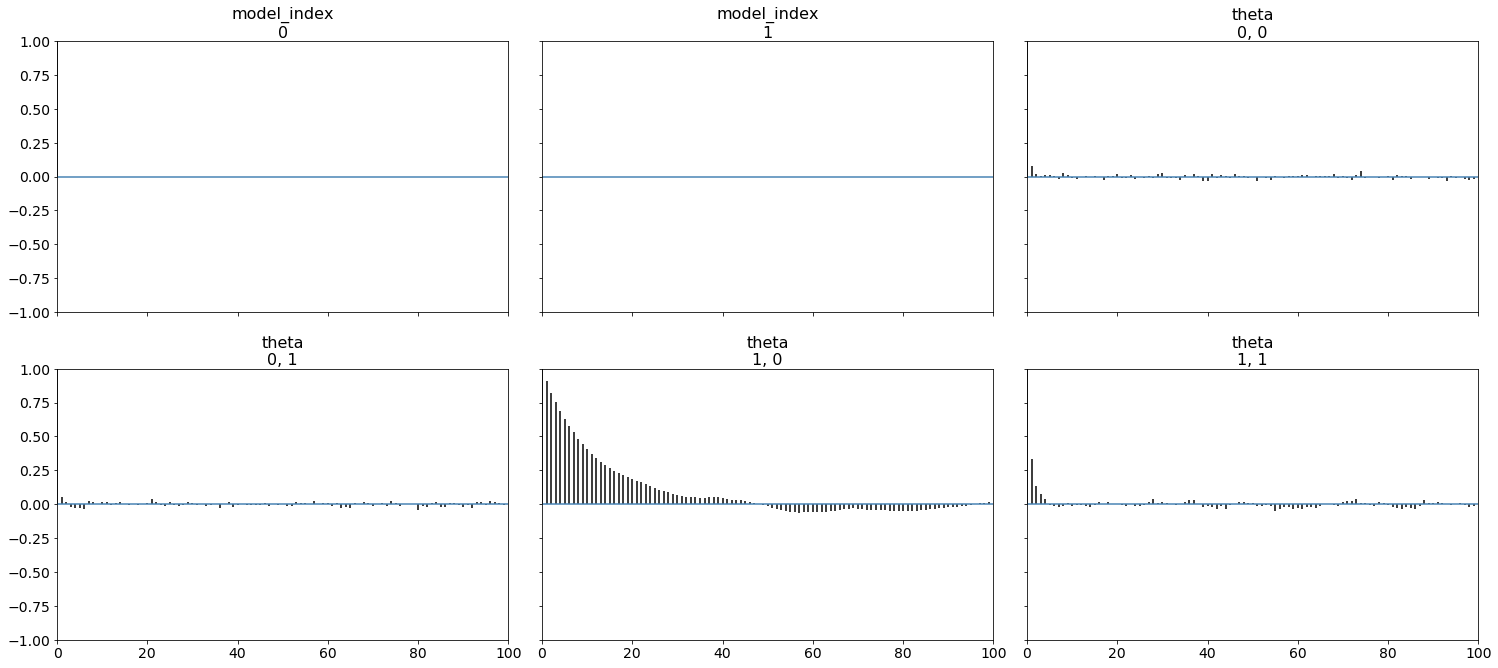

In [10]:
#


pm.traceplot(trace)
pm.autocorrplot(trace);

0.4999 0.5001


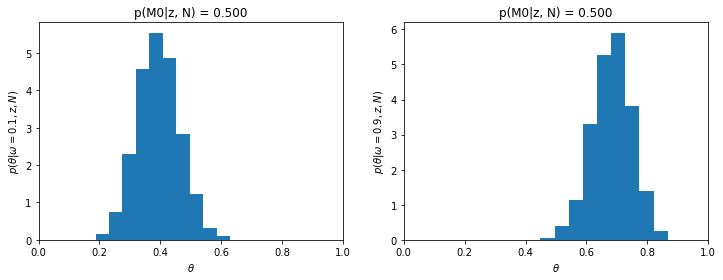

In [15]:

model_index_samples = trace['model_index']

p_M0 = sum(model_index_samples ==0)/len(model_index_samples)

p_M1 = 1- p_M0
print(p_M0, p_M1)

theta_sample = trace['theta']
theta_sample_M0 = theta_sample[model_index_samples == 0][:,0]
theta_sample_M1 = theta_sample[model_index_samples == 1][:,1]

fig, axs = plt.subplots(1,2, figsize=(12,4))

axs[0].hist(theta_sample_M0, density=True)
axs[0].set_ylabel(r'$p(\theta|\omega=0.1, z, N)$')
axs[0].set_title('p(M0|z, N) = {:.3f}'.format(p_M0))

axs[1].hist(theta_sample_M1, density=True)
axs[1].set_ylabel(r'$p(\theta|\omega=0.9, z, N)$')
axs[1].set_title('p(M0|z, N) = {:.3f}'.format(p_M1))

for ax in axs:
    ax.set_xlabel(r'$\theta$')
    ax.set_xlim(0,1);

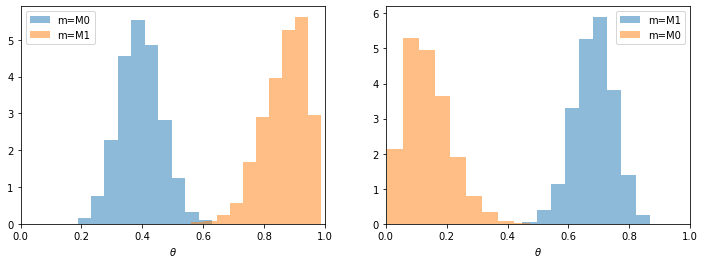

In [17]:
theta_sample_M0_in = trace['theta'][model_index_samples == 0][:, 0]
theta_sample_M0_out = trace['theta'][model_index_samples == 1][:, 0]
theta_sample_M1_in = trace['theta'][model_index_samples == 1][:, 1]
theta_sample_M1_out = trace['theta'][model_index_samples == 0][:, 1]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(theta_sample_M0_in, label='m=M0', density=True, alpha=0.5)
axs[0].hist(theta_sample_M0_out, label='m=M1', density=True, alpha=0.5)

axs[1].hist(theta_sample_M1_in, label='m=M1', density=True, alpha=0.5)
axs[1].hist(theta_sample_M1_out, label='m=M0', density=True, alpha=0.5)

for ax in axs:
    ax.set_xlabel(r'$\theta$')
    ax.set_xlim(0, 1)
    ax.legend();

In [20]:
with pm.Model() as model:
    model_index = pm.Categorical('model_index', p=[0.5, 0.5])
    
    κ0 = pm.math.switch(pm.math.eq(model_index, 0), 20, 50)
    κ1 = pm.math.switch(pm.math.eq(model_index, 0), 50, 20)
    
    ω0 = pm.math.switch(pm.math.eq(model_index, 0), 0.1, 0.4)
    ω1 = pm.math.switch(pm.math.eq(model_index, 0), 0.7, 0.9)
    
    α0 = ω0 * (κ0 - 2) + 1
    β0 = (1 - ω0) * (κ0 - 2) + 1
    θ0 = pm.Beta('theta0', α0, β0)
    
    α1 = ω1 * (κ1 - 2) + 1
    β1 = (1 - ω1) * (κ1 - 2) + 1
    θ1 = pm.Beta('theta1', α1, β1)
    
    θ = pm.math.switch(pm.math.eq(model_index, 0), θ0, θ1)
    
    y = pm.Binomial('y', p=θ, n=N, observed=z)
    trace = pm.sample(10000)

Sequential sampling (2 chains in 1 job)
CompoundStep
>BinaryGibbsMetropolis: [model_index]
>NUTS: [theta1, theta0]
Sampling chain 1, 0 divergences: 100%|██████████| 10500/10500 [00:20<00:00, 508.12it/s]


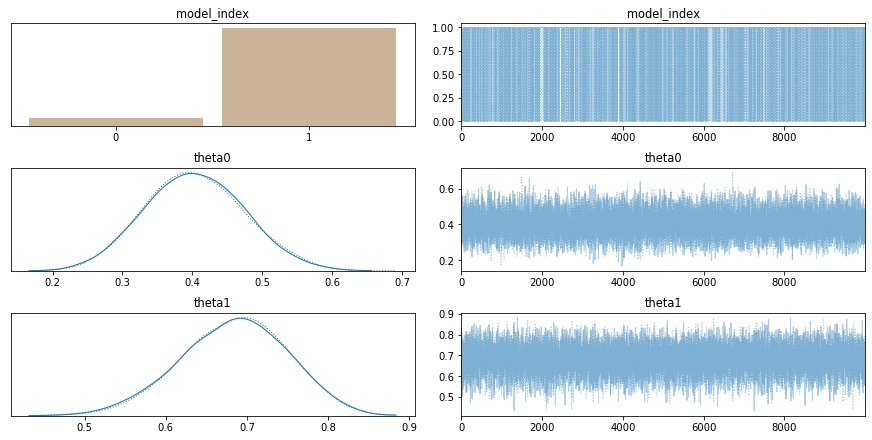

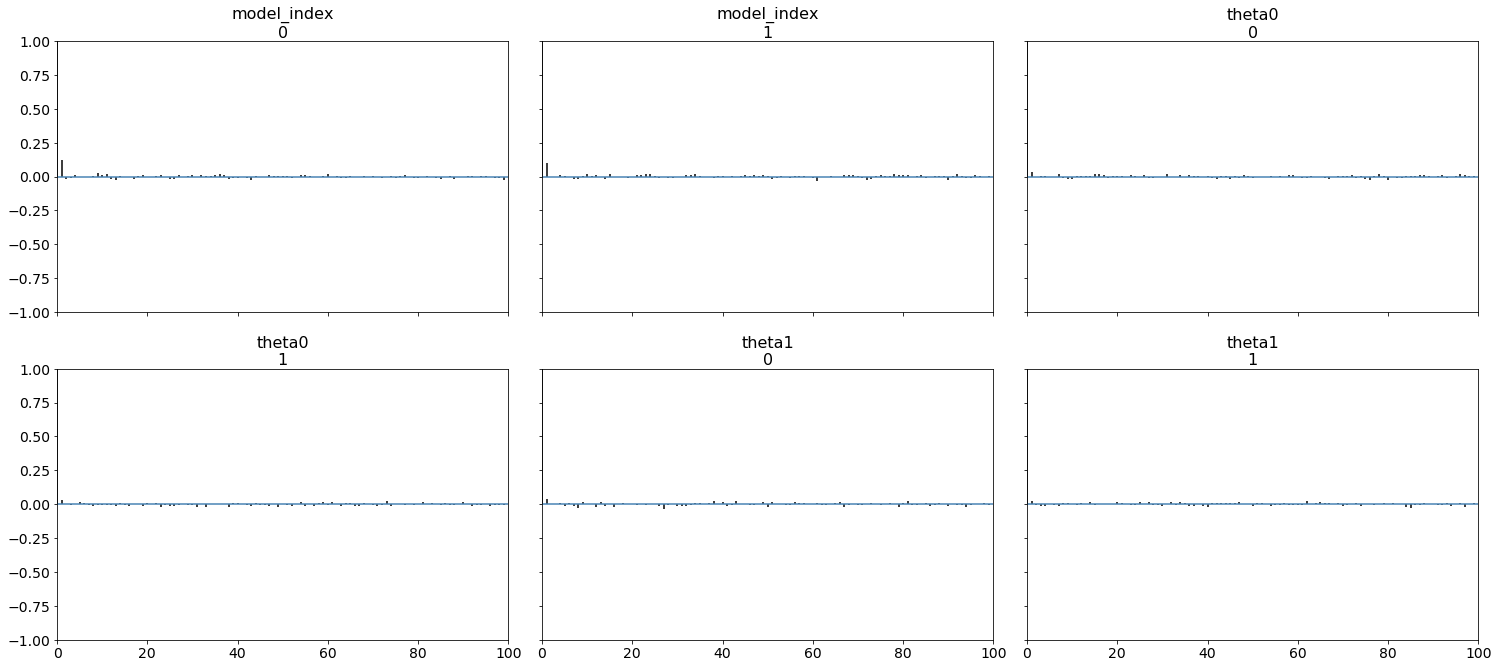

In [21]:
#model index is way better!
pm.traceplot(trace)
pm.autocorrplot(trace);

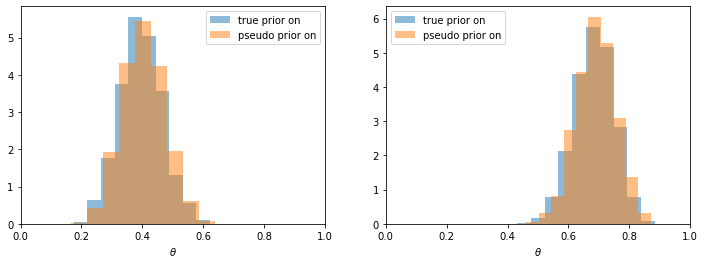

In [22]:
model_idx_sample = trace['model_index']
p_M0 = sum(model_idx_sample == 0) / len(model_idx_sample)
p_M1 = 1 - p_M0

theta_sample_M0_true = trace['theta0'][model_idx_sample == 0]
theta_sample_M0_pseudo = trace['theta0'][model_idx_sample == 1]
theta_sample_M1_true = trace['theta1'][model_idx_sample == 1]
theta_sample_M1_pseudo = trace['theta1'][model_idx_sample == 0]

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].hist(theta_sample_M0_true, label='true prior on', density=True, alpha=0.5)
axs[0].hist(theta_sample_M0_pseudo, label='pseudo prior on', density=True, alpha=0.5)

axs[1].hist(theta_sample_M1_true, label='true prior on', density=True, alpha=0.5)
axs[1].hist(theta_sample_M1_pseudo, label='pseudo prior on', density=True, alpha=0.5)

for ax in axs:
    ax.set_xlabel(r'$\theta$')
    ax.set_xlim(0, 1)
    ax.legend();